## Import library


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer


## Init datasets


In [5]:
train_df = pd.read_csv("../datasets/train.csv")
test_df = pd.read_csv("../datasets/test.csv")

In [6]:
train_df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [7]:
test_df.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


## Cleaning data


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


**TODO:**

- date must convert to datetime.
- solve missing values in num_sold


In [9]:
# conver date from object to datetime
train_df['date'] = pd.to_datetime(train_df['date'])

In [10]:
train_df = train_df.sort_values(by='date') # penting untuk forward/backward fill

# Forward Fill
train_df['num_sold_ffill'] = train_df['num_sold'].ffill()

# Backward Fill
train_df['num_sold_bfill'] = train_df['num_sold'].bfill()

# KNN Imputation
imputer = KNNImputer(n_neighbors=5) # n_neighbors bisa disesuaikan
train_df['num_sold_knn'] = imputer.fit_transform(train_df[['num_sold']])

# Membandingkan hasil imputasi
print(train_df[['num_sold', 'num_sold_ffill', 'num_sold_bfill', 'num_sold_knn']].head(10))

#cek missing value setelah di imputasi
print("\nJumlah Missing Value setelah imputasi:\n", train_df.isnull().sum())

    num_sold  num_sold_ffill  num_sold_bfill  num_sold_knn
0        NaN             NaN           579.0    752.527382
65     579.0           579.0           579.0    579.000000
64     911.0           911.0           911.0    911.000000
63     791.0           791.0           791.0    791.000000
62    1525.0          1525.0          1525.0   1525.000000
61    1692.0          1692.0          1692.0   1692.000000
60     261.0           261.0           261.0    261.000000
59      22.0            22.0            22.0     22.000000
58      20.0            20.0            20.0     20.000000
57      37.0            37.0            37.0     37.000000

Jumlah Missing Value setelah imputasi:
 id                   0
date                 0
country              0
store                0
product              0
num_sold          8871
num_sold_ffill       1
num_sold_bfill       0
num_sold_knn         0
dtype: int64


In [11]:
# delete num_sold, num_sold_ffill, num_sold_bfill, and replace with num_sold_knn
train_df = train_df.sort_values(by='date')

# Imputasi dan penggantian nama kolom dalam satu baris
imputer = KNNImputer(n_neighbors=5)
train_df = train_df.assign(num_sold=imputer.fit_transform(train_df[['num_sold']]))

# Menghapus kolom num_sold_ffill, num_sold_bfill (jika masih ada)
try: # menggunakan try except untuk mengatasi error jika kolom tidak ada
    train_df = train_df.drop(columns=['num_sold_ffill', 'num_sold_bfill'])
except KeyError:
    pass # jika kolom tidak ada, abaikan error

#cek missing value
print("\nJumlah Missing Value setelah perubahan:\n", train_df.isnull().sum())


Jumlah Missing Value setelah perubahan:
 id              0
date            0
country         0
store           0
product         0
num_sold        0
num_sold_knn    0
dtype: int64


In [12]:
train_df.head()

,id,date,country,store,product,num_sold,num_sold_knn
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,752.527382,752.527382
44,44,2010-01-01,Italy,Premium Sticker Mart,Kerneler Dark Mode,861.000000,861.000000
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.000000,973.000000
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.000000,906.000000
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.000000,423.000000


**TODO: DONE**


## Plotting


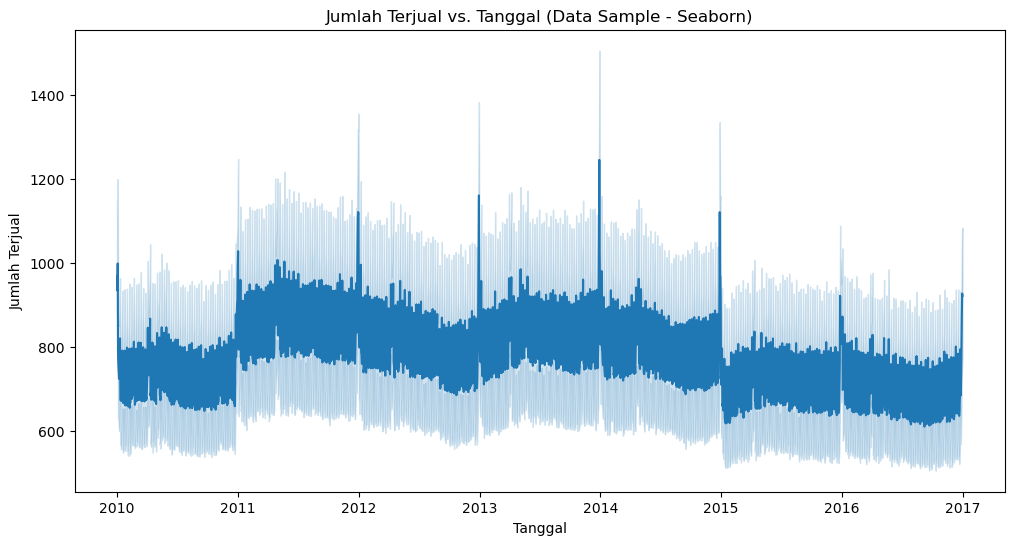

In [13]:
# sample_data = train_df[['date', 'num_sold']].sample(frac=0.1, random_state=42)
# train_df = train_df.assign(num_sold=imputer.fit_transform(train_df[['num_sold']]))
train_df = train_df.assign(num_sold=imputer.fit_transform(train_df[['num_sold']]))

plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='num_sold', data=train_df)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Terjual')
plt.title('Jumlah Terjual vs. Tanggal (Data Sample - Seaborn)')
plt.show()